In [1]:
from torch.utils.data import Dataset
import pandas as pd
import torch
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pd.read_csv(csv_file, header=None)

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        #정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        return label, image_values, target

    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')

In [2]:
mnist_dataset = MnistDataset('c:/data/data/mnist_train.csv')

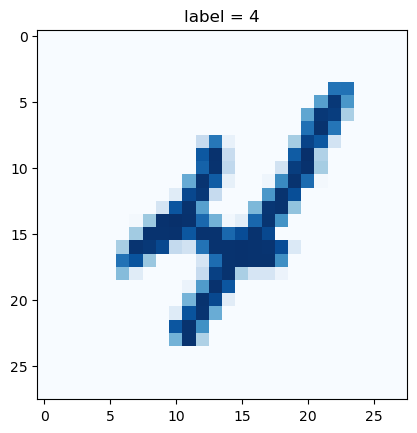

In [3]:
mnist_dataset.plot_image(9)

In [4]:
print(mnist_dataset[100][0])
print(mnist_dataset[100][1][:100])

5
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])


In [5]:
import torch.nn as nn
class Classifier(nn.Module):

    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
        self.counter = 0
        self.progress = []
        
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)

        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [6]:
model = Classifier()
epochs = 4
for i in range(epochs):
    print('epoch', i+1, "/", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        model.train(image_data_tensor, target_tensor)

epoch 1 / 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
epoch 2 / 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
epoch 3 / 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
epoch 4 / 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000


In [7]:
mnist_test_dataset = MnistDataset('c:/data/data/mnist_test.csv')

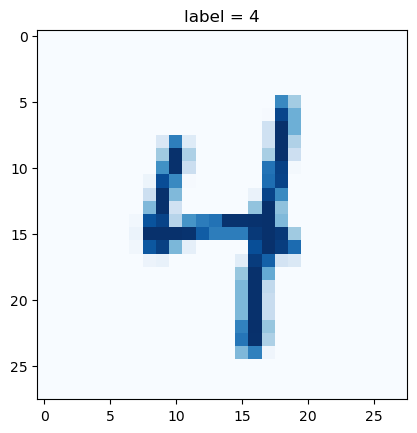

In [8]:
idx = 19
mnist_test_dataset.plot_image(idx)

<AxesSubplot:>

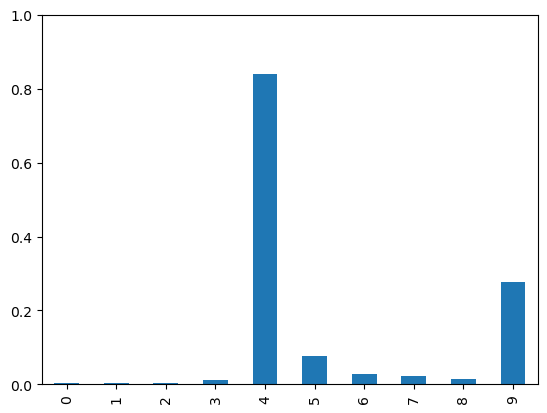

In [9]:
image_data = mnist_test_dataset[idx][1]
output = model.forward(image_data)
pd.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

In [10]:
score = 0
items = 0
for label, image_data_tensor, target_tensor in mnist_test_dataset:
    answer = model.forward(image_data_tensor).detach().numpy()
    if answer.argmax() == label:
        score += 1
    items += 1
print(score, items, score/items)

8809 10000 0.8809
